<a href="https://colab.research.google.com/github/ericriveraisme/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/ER_LS_DSPT3_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - From a URL (github or otherwise)
 - CSV upload method
 - !wget method
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Data Imputation"
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot (if we have time)

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [205]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [207]:
# Step 3 - verify we've got *something*
flag_data.sample(10)

,Afghanistan,5,1,648,16,10,2,0,3,5.1,1.1,1.2,0.1,1.3,1.4,1.5,0.2,green,0.3,0.4,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
53,Ethiopia,4,1,1222,31,10,1,0,3,3,1,1,0,1,0,0,0,green,0,0,0,0,0,0,0,0,0,0,green,red
133,Papua-New-Guinea,6,2,463,3,1,5,0,0,4,1,0,0,1,1,1,0,black,0,0,0,0,5,0,1,0,1,0,red,black
75,Haiti,1,4,28,6,3,0,2,0,2,1,0,0,0,0,1,0,black,0,0,0,0,0,0,0,0,0,0,black,red
58,France,3,1,547,54,3,0,3,0,3,1,0,1,0,1,0,0,white,0,0,0,0,0,0,0,0,0,0,blue,red
188,Western-Samoa,6,3,3,0,1,1,0,0,3,1,0,1,0,1,0,0,red,0,0,0,1,5,0,0,0,0,0,blue,red
187,Vietnam,5,1,333,60,10,6,0,0,2,1,0,0,1,0,0,0,red,0,0,0,0,1,0,0,0,0,0,red,red
95,Laos,5,1,236,3,10,6,0,3,3,1,0,1,0,1,0,0,red,1,0,0,0,0,0,0,0,0,0,red,red
94,Kuwait,5,1,18,2,8,2,0,3,4,1,1,0,0,1,1,0,green,0,0,0,0,0,0,0,0,0,0,green,red
176,Tuvalu,6,2,0,0,1,1,0,0,5,1,0,1,1,1,0,0,blue,0,1,1,1,9,0,0,0,0,0,white,blue
141,Romania,3,1,237,22,6,6,3,0,7,1,1,1,1,1,0,1,red,0,0,0,0,2,0,0,1,1,1,blue,red


In [208]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [209]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  45765      0 --:--:-- --:--:-- --:--:-- 45765
    194     194   15240


In [210]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [211]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [212]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [213]:
flag_data.isna()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [214]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Steps of Loading and Exploring a Dataset:

- Find a dataset that looks interesting
- Learn what you can about it 
 - What's in it? 
 - How many rows and columns? 
 - What types of variables?
- Look at the raw contents of the file
- Load it into your workspace (notebook)
 - Handle any challenges with headers
 - Handle any problems with missing values
- Then you can start to explore the data
 - Look at the summary statistics
 - Look at counts of different categories
 - Make some plots to look at the distribution of the data

## 3 ways of loading a dataset

### From its URL

In [0]:
pd.read_csv?

In [0]:
dataset_url ="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_headers = ["age","workclass","fnlwgt","education",
                  "education-num","marital-status","occupation",
                  "relationship","race","sex","capital-gain",
                  "capital-loss","hours-per-week","native-country"]

### From a local file

In [217]:
from google.colab import files

uploaded = files.upload()

#pd.read_json()

In [218]:
df = pd.read_csv("adult.data", names=column_headers)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [219]:
df.shape

(32561, 14)

In [220]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [221]:
df.sample(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
44,Private,225879,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Other,Female,0,0,30,Mexico,>50K
63,Self-emp-inc,189253,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
52,Private,152373,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
21,Private,149809,Assoc-acdm,12,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
29,Private,184806,Prof-school,15,Never-married,Prof-specialty,Other-relative,White,Male,0,0,50,United-States,<=50K
36,Private,531055,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,48,United-States,>50K
45,Self-emp-inc,142719,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
23,Private,169104,Some-college,10,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,0,0,25,United-States,<=50K
51,Self-emp-inc,194995,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
25,Local-gov,249214,Some-college,10,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


### Using the `!wget` command

In [222]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-09-06 03:42:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.6’

adult.data.6        100%[===================>]   3.79M  7.52MB/s    in 0.5s    

2019-09-06 03:42:45 (7.52 MB/s) - ‘adult.data.6’ saved [3974305/3974305]



In [223]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -o adult.data.2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3881k  100 3881k    0     0  4888k      0 --:--:-- --:--:-- --:--:-- 4888k


In [224]:
df = pd.read_csv("adult.data.2", names=column_headers)

df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Part 2 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [225]:
import numpy as np
df = pd.read_csv('adult.data', names=column_headers)
df = df.replace(' ?', np.NaN)

df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Fill Missing Values

In [226]:
df.fillna('unknown')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
df = df.fillna("unknown")

In [228]:
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [229]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [230]:
df.iloc[14]

age                           Private
workclass                      121772
fnlwgt                      Assoc-voc
education                          11
education-num      Married-civ-spouse
marital-status           Craft-repair
occupation                    Husband
relationship       Asian-Pac-Islander
race                             Male
sex                                 0
capital-gain                        0
capital-loss                       40
hours-per-week                unknown
native-country                   >50K
Name: 40, dtype: object

In [231]:
range(0, 32561)

range(0, 32561)

In [232]:
df.index

Int64Index([39, 50, 38, 53, 28, 37, 49, 52, 31, 42,
            ...
            32, 43, 32, 53, 22, 27, 40, 58, 22, 52],
           dtype='int64', length=32561)

In [233]:
df[['age', "education"]]

# how to slice data into a subset of your data

,age,education
39,State-gov,13
50,Self-emp-not-inc,13
38,Private,9
53,Private,7
28,Private,13
37,Private,14
49,Private,5
52,Self-emp-not-inc,9
31,Private,14
42,Private,13


In [234]:
df['native-country'] == ' India'

# This returns a series, a data frame is a collection of a series

#df[df['native-country'] == ' India' & (df['education'] == ' Bachelors')]

39    False
50    False
38    False
53    False
28    False
37    False
49    False
52    False
31    False
42    False
37    False
30    False
23    False
32    False
40    False
34    False
25    False
32    False
38    False
43    False
40    False
54    False
35    False
43    False
59    False
56    False
19    False
54    False
39    False
49    False
      ...  
30    False
34    False
54    False
37    False
22    False
34    False
30    False
38    False
71    False
45    False
41    False
72    False
45    False
31    False
39    False
37    False
43    False
65    False
43    False
43    False
32    False
43    False
32    False
53    False
22    False
27    False
40    False
58    False
22    False
52    False
Name: native-country, Length: 32561, dtype: bool

# Part 3 - Explore the Dataset:

## Look at "Summary Statistics

### Numeric

In [235]:
df.

SyntaxError: ignored

###Non-Numeric

In [0]:
df.describe_(exclude="number")

In [0]:
df.describe_(exclude="number").T

## Look at Categorical Values

In [0]:
df['martial-status'].value_counts()

In [0]:
df['martial-status'].value_counts(normalize=True)

# Part 4 - Basic Visualizations (using the Pandas Library)



## Histogram

In [0]:
# Pandas Histogram 
# How to create a histogram

df['age'].hist(bins=20)

## Density Plot (KDE)

In [0]:
# Pandas Density Plot

df['age'].plot.density()

## Scatter Plot

In [0]:
# Pandas Scatterplot

df.plot.scatter('age','hours-per-week')

# Bonus

In [0]:
bike_data_url ="https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv"

In [237]:
df = pd.read_csv(bike_data_url,
                 encoding="latin1",
                 sep=';',
                 parse_dates=['Date'],
                 dayfirst=True
                 )

df

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,2012-01-01,35,NaN,0,38,51,26,10,16,NaN
1,2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2,2012-01-03,135,NaN,2,104,248,89,3,58,NaN
3,2012-01-04,144,NaN,1,116,318,111,8,61,NaN
4,2012-01-05,197,NaN,2,124,330,97,13,95,NaN
5,2012-01-06,146,NaN,0,98,244,86,4,75,NaN
6,2012-01-07,98,NaN,2,80,108,53,6,54,NaN
7,2012-01-08,95,NaN,1,62,98,64,11,63,NaN
8,2012-01-09,244,NaN,2,165,432,198,12,173,NaN
9,2012-01-10,397,NaN,3,238,563,275,18,241,NaN


In [238]:
df[:3]

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,2012-01-01,35,NaN,0,38,51,26,10,16,NaN
1,2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2,2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [239]:
df.head(3)

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,2012-01-01,35,NaN,0,38,51,26,10,16,NaN
1,2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2,2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [240]:
# convert French columns into unidecode

!pip install unidecode

In [0]:
import unidecode

In [242]:
df.columns

Index(['Date', 'Berri 1', 'Brébeuf (données non disponibles)',
       'Côte-Sainte-Catherine', 'Maisonneuve 1', 'Maisonneuve 2', 'du Parc',
       'Pierre-Dupuy', 'Rachel1', 'St-Urbain (données non disponibles)'],
      dtype='object')

In [243]:
unidecode.unidecode('Brébeuf (données non disponibles)').lower()

'brebeuf (donnees non disponibles)'

In [244]:
list_1 =[10, 20, 30]
list_2 = [i//10 for i in list_1]
#for i in list_1:
 # list_2.append(i/10)
 # list_2
list_2

[1, 2, 3]

In [245]:
new_cols = [unidecode.unidecode(col).lower() for col in df.columns]

new_cols

['date',
 'berri 1',
 'brebeuf (donnees non disponibles)',
 'cote-sainte-catherine',
 'maisonneuve 1',
 'maisonneuve 2',
 'du parc',
 'pierre-dupuy',
 'rachel1',
 'st-urbain (donnees non disponibles)']

In [246]:
df.colums = new_cols
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,2012-01-01,35,NaN,0,38,51,26,10,16,NaN
1,2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2,2012-01-03,135,NaN,2,104,248,89,3,58,NaN
3,2012-01-04,144,NaN,1,116,318,111,8,61,NaN
4,2012-01-05,197,NaN,2,124,330,97,13,95,NaN


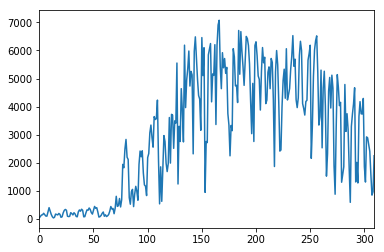

In [247]:
df['Berri 1'].plot()

In [248]:
df.plot(figsize=(15, 20))

ValueError: ignored

ValueError: ignored

<Figure size 1080x1440 with 1 Axes>

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [0]:
import requests

In [0]:
r = requests.get('https://cat-fact.herokuapp.com/facts') 

In [0]:
json_data = r.json()

In [252]:
type(json_data)

dict

In [253]:
json_data.keys()

dict_keys(['all'])

In [254]:
res = json_data['all']

res[:3]

[{'_id': '58e0086f0aac31001185ed02',
  'text': "Cats can't taste sweetness.",
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '58e007480aac31001185ecef',
   'name': {'first': 'Kasimir', 'last': 'Schulz'}},
  'userUpvoted': None},
 {'_id': '591d9bb2227c1a0020d26826',
  'text': 'The CIA spent US$20 million in the 60s training cats to spy on the Soviets. The first spy cat was hit by a taxi.',
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '587288f6e6f85e64ae1c7ef7',
   'name': {'first': 'Alex', 'last': 'Wohlbruck'}},
  'userUpvoted': None},
 {'_id': '588e746706ac2b00110e59ff',
  'text': 'Domestic cats spend about 70 percent of the day sleeping. And 15 percent of the day grooming.',
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '588e6e8806ac2b00110e59c3',
   'name': {'first': 'Thomas', 'last': 'Lockwood'}},
  'userUpvoted': None}]

In [260]:
for i in res[:3]:
  print(f"{i['user']['name']['first']} {i['user']['name']['last']}: {i['text']}")

Kasimir Schulz: Cats can't taste sweetness.
Alex Wohlbruck: The CIA spent US$20 million in the 60s training cats to spy on the Soviets. The first spy cat was hit by a taxi.
Thomas Lockwood: Domestic cats spend about 70 percent of the day sleeping. And 15 percent of the day grooming.


In [261]:
d = {"text": [...], "username": [...], "upvotes": []}
pd.DataFrame(d)

ValueError: ignored